# word2vecを利用した単語のベクトル化

単語をベクトル空間上の密なベクトルに変換する技術。

ライブラリのインストール → 前処理 → word2vecモデルを学習

日本語を学習する際には、単語リストを事前に作成する必要がある。


In [60]:
%%capture
!pip install gensim
!pip install janome | tail -n 1
!pip install japanize-matplotlib

## 日本語単語リスト作成

In [24]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

def extract_words(text) -> list:
    """名詞・動詞・形容詞が原型の単語を配列形式で取得
    """
    tokens = t.tokenize(text)
    return [token.base_form for token in tokens
        if token.part_of_speech.split(',')[0] in['名詞', '動詞']]


# 関数をテストする
# words = extract_words('シュトロハイムはカーズとの戦いで体の真っ二つに切られた。')
# for word in words:
#    print(word)

with open('japanese_text.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
      # 全体のテキストを句点('。')で区切った配列にする。
      sentences = line.split('。')
      # それぞれの文章を単語リストに変換(処理に数分かかります)
      word_list = [extract_words(sentence) for sentence in sentences]

      # 結果の一部を確認
      # for word in word_list[0]:
      #     print(word)

In [30]:
from gensim.models import Word2Vec

# 日本語テキストの前処理を行う関数
def preprocess_text(text) -> str:
    # ここに適切な前処理を実装する
    return text

model = Word2Vec(word_list, vector_size=100,min_count=1,window=5, workers=4)
model.save("word2vec.model")

In [35]:
# 結果は１００次元のベクトル
model.__dict__['wv']['町']

array([-5.3440867e-04,  2.3528043e-04,  5.1058913e-03,  9.0062693e-03,
       -9.2995148e-03, -7.1177017e-03,  6.4577484e-03,  8.9785587e-03,
       -5.0111376e-03, -3.7655497e-03,  7.3810215e-03, -1.5400107e-03,
       -4.5440854e-03,  6.5555195e-03, -4.8674010e-03, -1.8112638e-03,
        2.8754296e-03,  9.9147914e-04, -8.2843415e-03, -9.4533181e-03,
        7.3169535e-03,  5.0749914e-03,  6.7583006e-03,  7.6524785e-04,
        6.3486006e-03, -3.4003176e-03, -9.4333891e-04,  5.7657231e-03,
       -7.5217141e-03, -3.9378121e-03, -7.5148409e-03, -9.3263545e-04,
        9.5395669e-03, -7.3241736e-03, -2.3351070e-03, -1.9386164e-03,
        8.0831973e-03, -5.9321010e-03,  4.0716019e-05, -4.7535761e-03,
       -9.6016238e-03,  5.0045638e-03, -8.7618558e-03, -4.3882430e-03,
       -3.1096468e-05, -2.9277886e-04, -7.6658758e-03,  9.6110478e-03,
        4.9851933e-03,  9.2360759e-03, -8.1591327e-03,  4.4941041e-03,
       -4.1352157e-03,  8.2472363e-04,  8.4983343e-03, -4.4635390e-03,
      

In [43]:
# 関数most_similarを使って「町」の類似単語を調べる
ret = model.wv.most_similar(positive=['町'])

for item in ret:
    print(item[0], item[1])

永遠 0.2192552536725998
田中 0.21614037454128265
さ 0.09321307390928268
助け合う 0.09298907220363617
さん 0.0795925185084343
続ける 0.06282267719507217
中 0.05445783585309982
文化 0.026917174458503723
いる 0.01618828997015953
人々 -0.010771028697490692


In [61]:
# 可視化する
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

df = pd.DataFrame(ret, columns=['単語', 'ベクトル'])

In [62]:
sorted_df = df.sort_values(by='ベクトル')
sorted_df

,単語,ベクトル
9,人々,-0.010771
8,いる,0.016188
7,文化,0.026917
6,中,0.054458
5,続ける,0.062823
4,さん,0.079593
3,助け合う,0.092989
2,さ,0.093213
1,田中,0.216140
0,永遠,0.219255


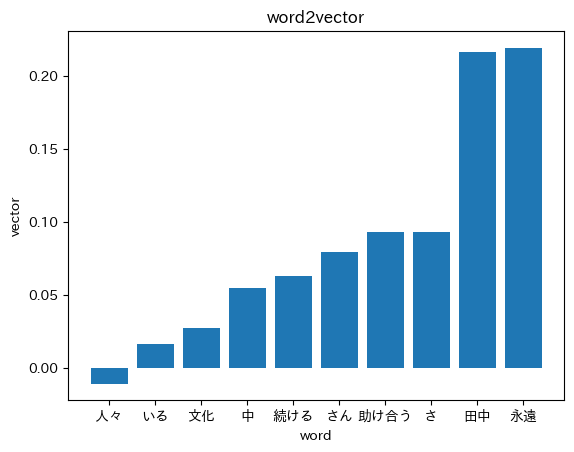

In [65]:
plt.bar(sorted_df['単語'], sorted_df['ベクトル'])

# グラフにタイトルとラベルを追加
plt.title('word2vector')
plt.xlabel('word')
plt.ylabel('vector')

# グラフを表示
plt.show()

## 参考にしたサイト

1. [Word2vec embeddings](https://radimrehurek.com/gensim/models/word2vec.html)
2. [15分でできる日本語Word2Vec](https://qiita.com/makaishi2/items/63b7986f6da93dc55edd)